# Self-Driving Cab

**PROBLEM STATEMENT**: There are 4 locations (labeled by different letters), and our job is to pick up the passenger at one location and drop him off at another. We receive +20 points for a successful drop-off and lose 1 point for every time-step it takes. There is also a 10 point penalty for illegal pick-up and drop-off actions.

In [1]:
import gym

import numpy as np
import matplotlib.pyplot as plt

from IPython.display import clear_output
from time import sleep

### Import and Explore the environment

In [6]:
env = gym.make("Taxi-v3").env

In [7]:
env.reset() # reset environment to a new, random state
env.render()

print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Action Space Discrete(6)
State Space Discrete(500)


## Q-Learning

In our Taxi environment, we have the reward table, P, which the agent will learn from. It works by trying to receive a reward for taking an action in the current state, then updating a **Q-value** (*state-action value*) to remind you if that action was beneficial.

A **Q-value** for a particular state-action combination is representative of the "quality" of an action taken from that state. Better Q-values imply better chances of getting greater rewards.

In [8]:
# PARAMETERS
episodes = 10000

EPSILON = 0.1
ALPHA = 0.1
GAMMA = 0.6

In [9]:
q_table = np.zeros((env.observation_space.n, env.action_space.n))

In [10]:
def train(env, q_table, episodes=1000, epsilon=0.1, alpha=0.1, gamma=0.6):
    
    rewards = []
    
    for episode in range(1, episodes+1):
        
        if episode % 1000 == 0:
            print('Evaluating Episode: ', episode)
            
        state = env.reset()
        done = False
        
        episode_reward = 0
        while not done:

            # ε-greedy policy
            if np.random.uniform() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state])

            # Performing selected action
            new_state, reward, done, _ = env.step(action)

            # Q-learning update
            q_table[state][action] += alpha * (reward + gamma * np.max(q_table[new_state]) - q_table[state][action])

            episode_reward += reward
            state = new_state
            
        rewards.append(episode_reward)
        
    return q_table, rewards

In [11]:
q_table, reward_history = train(env, q_table, episodes=episodes, epsilon=EPSILON, alpha=ALPHA, gamma=GAMMA)

Evaluating Episode:  1000
Evaluating Episode:  2000
Evaluating Episode:  3000
Evaluating Episode:  4000
Evaluating Episode:  5000
Evaluating Episode:  6000
Evaluating Episode:  7000
Evaluating Episode:  8000
Evaluating Episode:  9000
Evaluating Episode:  10000


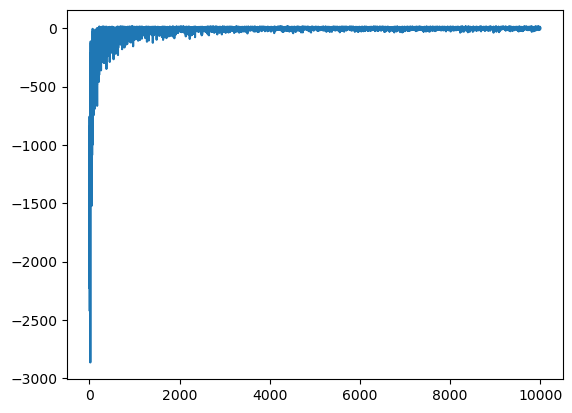

In [12]:
plt.plot(range(1, episodes+1), reward_history)
#plt.ylim([-500, None])
plt.show()

## Test

In [13]:
test_episodes = 1000

tot_steps = 0
tot_penalities = 0

for episode in range(1, test_episodes+1):
    
    state = env.reset()
    done = False
    
    steps = 0
    while not done:
        
        # Stucked
        if steps == 100:
            tot_steps -= 100
            break

        # Action selection
        action = np.argmax(q_table[state])
        
        # Performing selected action
        new_state, reward, done, _ = env.step(action)
        
        if reward == -10:
            tot_penalities += 1
            
        tot_steps += 1
        steps += 1
        
        state = new_state
    
print(f'Average Steps per episode: {(tot_steps / test_episodes):.2f}')

Average Steps per episode: 11.54


In [14]:
for episode in range(5):
    
    state = env.reset()
    done = False
    
    steps = 0
    while not done and steps < 30:
        env.render('human')
        sleep(.1)
        clear_output(wait=True)

        # Action selection
        action = np.argmax(q_table[state])
        
        # Performing selected action
        new_state, reward, done, _ = env.step(action)
        
        if reward == -10:
            tot_penalities += 1
            
        tot_steps += 1
        steps += 1
        
        state = new_state
    
    sleep(2)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
